## Image Smoothing
- There are LOW Pass Filter (LPS) which use to remove Noise from Image
- There are High Pass Filter (HPS) which use to detect and finding Edges

In [2]:
import cv2
import numpy as np

### 1. Homogeneous Filter
- The box filter replaces each pixel with the average of its neighboring pixels within a defined neighborhood. It effectively reduces high-frequency noise but may blur the edges and fine details in the image.

In [24]:
img = cv2.imread('Images\Image3.jpg')

# Filter kernel is [1/kernel(h,w) * kernel]
kernel = np.ones([2,2], np.float32)/4
h_filter = cv2.filter2D(img, -1, kernel)

cv2.imshow('Noisy Image',img)
cv2.imshow('Homogeneous',h_filter)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Blur Filter

In [25]:
img = cv2.imread('Images\Image3.jpg')

# Kernel of (3,3)
blur = cv2.blur(img, (3,3))

cv2.imshow('Noisy Image',img)
cv2.imshow('Blur',blur)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 3. Gaussian Filter
- The Gaussian filter applies a weighted average to each pixel based on a Gaussian kernel. It smoothes the image while preserving edges better than the box filter. The amount of smoothing is controlled by the standard deviation of the Gaussian kernel.
- Consider the level of noise in the image. If the image has significant noise, a larger kernel size and higher standard deviation may be required for better noise reduction. If the image contains fine details or edges that need to be preserved, a smaller kernel size and lower standard deviation can be more appropriate.

In [30]:
img = cv2.imread('Images\Image3.jpg')

# Kernel of (3,3), 0 -> Sigma x Value
gau = cv2.GaussianBlur(img, (3,3), 0)

cv2.imshow('Noisy Image',img)
cv2.imshow('Gaussian',gau)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 4. Median Filter
- The median filter replaces each pixel with the median value of its neighboring pixels. It is effective in reducing impulse noise (salt-and-pepper noise) while preserving edges and fine details.

In [35]:
img = cv2.imread('Images\Image3.jpg')

# Highly Effective in removing salt-and-pepper noise
med = cv2.medianBlur(img, 3)

cv2.imshow('Noisy Image',img)
cv2.imshow('Median',med)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 5. Bilateral Filter
- The sigma color parameter. It defines the color similarity threshold. Pixels within this threshold in color space are considered similar and are included in the filtering process. A higher value allows more color variation and can result in more edges being preserved, while a lower value produces stronger smoothing.
-  The sigma space parameter. It defines the spatial similarity threshold. Pixels within this threshold in spatial proximity are considered neighbors and are included in the filtering process. A higher value allows a wider range of spatial neighbors and can preserve more large-scale structures, while a lower value produces stronger local smoothing.

In [60]:
img = cv2.imread('Images\Image3.jpg')

# Parameters (src, neighbour_pixel_diameter, sigma_color, sigma_space)
bl_f = cv2.bilateralFilter(img, 10, 50, 50)

cv2.imshow('Noisy Image',img)
cv2.imshow('Bilateral',bl_f)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 6. Plotting above results

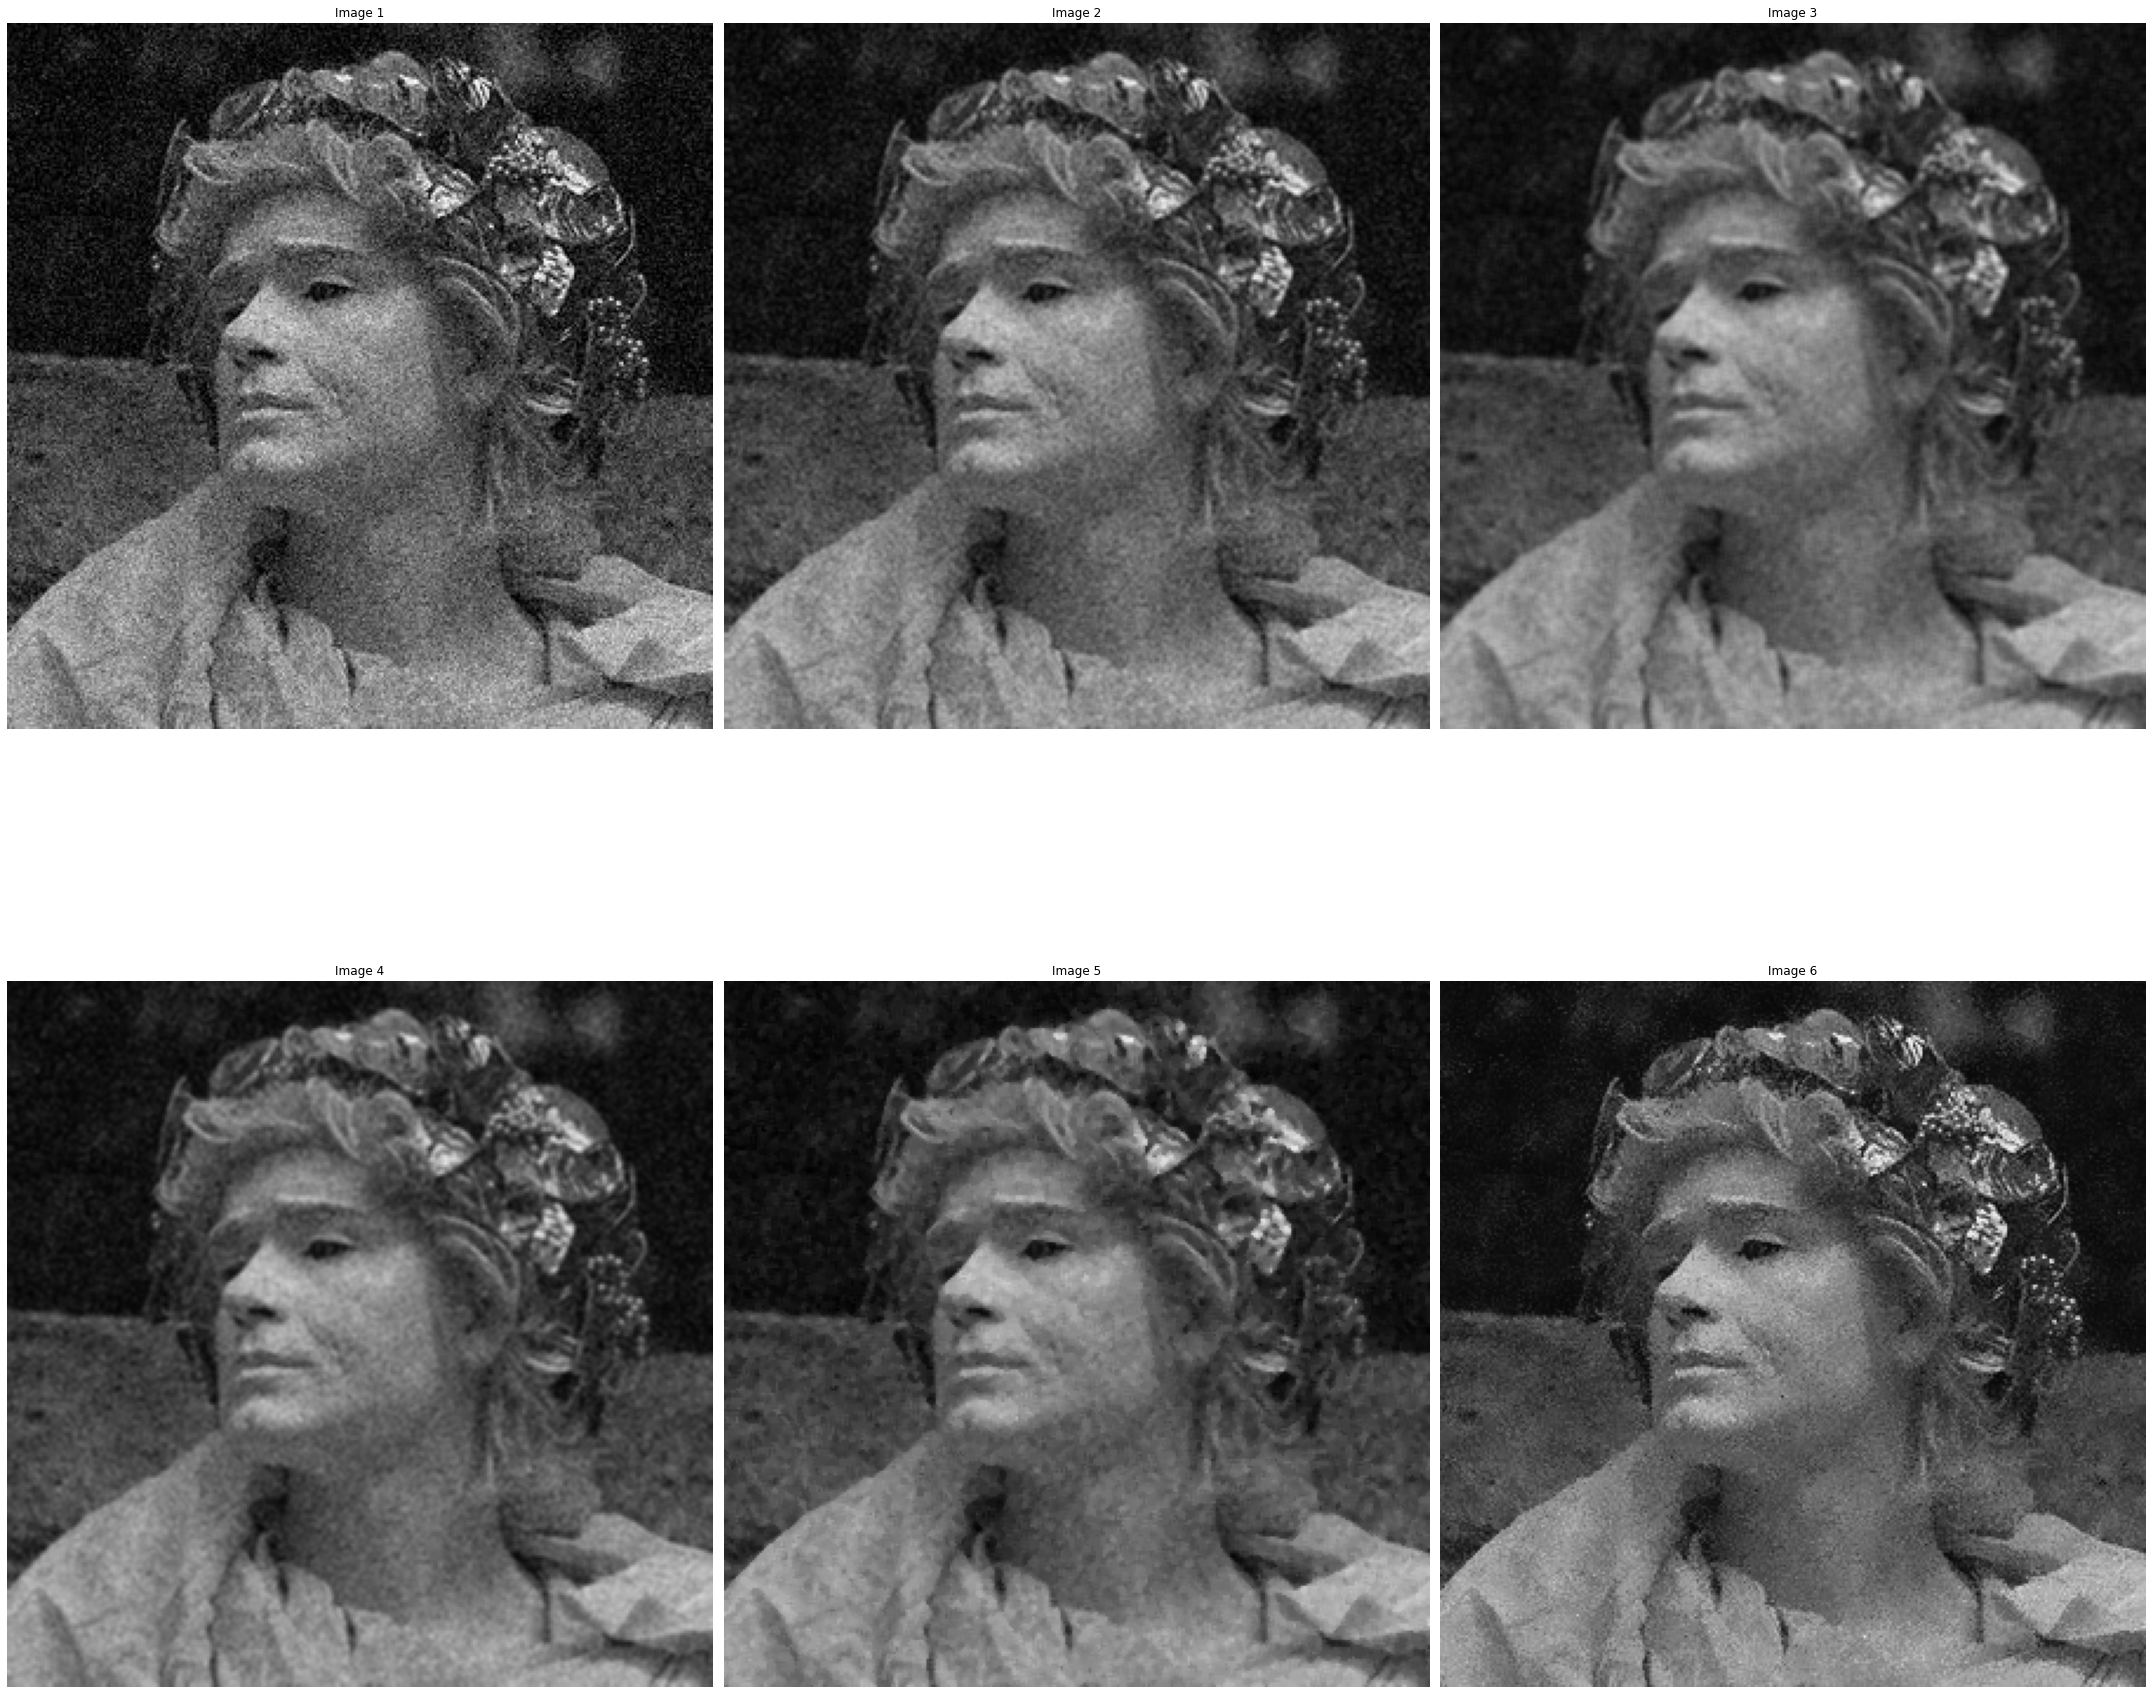

In [65]:
import matplotlib.pyplot as plt

image_list = [img, h_filter, blur, gau, med, bl_f]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,30))

for idx, image in enumerate(image_list):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    row_idx = idx // 3
    col_idx = idx % 3
    
    axes[row_idx, col_idx].imshow(image_rgb)
    axes[row_idx, col_idx].axis('off')
    axes[row_idx, col_idx].set_title(f"Image {idx+1}")

fig.tight_layout()


plt.show()